# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f832dcb5700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [6]:
df["case_status"].unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [7]:
df["class_of_admission"].unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,

In [9]:
df_select =df[["class_of_admission","country_of_citzenship","case_status", "us_economic_sector", "pw_soc_title"]]

In [10]:
df_select.head()

,class_of_admission,country_of_citzenship,case_status,us_economic_sector,pw_soc_title
0,J-1,ARMENIA,Certified,IT,"Computer Software Engineers, Applications"
1,B-2,POLAND,Denied,Other Economic Sector,Hazardous Materials Removal Workers
2,H-1B,INDIA,Certified,Aerospace,Civil Engineers
3,B-2,SOUTH KOREA,Certified,Other Economic Sector,File Clerks
4,L-1,CANADA,Certified,Advanced Mfg,Sales Engineers


# 3.) Clean your data for a decision tree

In [11]:
X1 = pd.get_dummies(df_select[["class_of_admission","country_of_citzenship", "us_economic_sector", "pw_soc_title"]])
y = df_select["case_status"]

In [12]:
X1.head()

,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,class_of_admission_E-2,class_of_admission_E-3,class_of_admission_EWI,class_of_admission_F-1,class_of_admission_F-2,class_of_admission_G-1,class_of_admission_G-4,class_of_admission_G-5,class_of_admission_H-1A,class_of_admission_H-1B,class_of_admission_H-1B1,class_of_admission_H-1C,class_of_admission_H-2A,class_of_admission_H-2B,class_of_admission_H-3,class_of_admission_H-4,class_of_admission_H1B,class_of_admission_I,class_of_admission_J-1,class_of_admission_J-2,class_of_admission_K-1,class_of_admission_L-1,class_of_admission_L-2,class_of_admission_M-1,class_of_admission_M-2,class_of_admission_N,class_of_admission_Not in USA,class_of_admission_O-1,class_of_admission_O-2,class_of_admission_O-3,class_of_admission_P-1,class_of_admission_P-2,class_of_admission_P-3,class_of_admission_P-4,class_of_admission_Parol,class_of_admission_Parolee,class_of_admission_Q,class_of_admission_R-1,class_of_admission_R-2,class_of_admission_T-1,class_of_admission_TD,class_of_admission_TN,class_of_admission_TPS,class_of_admission_U-1,class_of_admission_V-2,class_of_admission_VWB,class_of_admission_VWT,country_of_citzenship_AFGHANISTAN,country_of_citzenship_ALBANIA,country_of_citzenship_ANGOLA,country_of_citzenship_ARGENTINA,country_of_citzenship_ARMENIA,country_of_citzenship_AUSTRALIA,country_of_citzenship_AUSTRIA,country_of_citzenship_AZERBAIJAN,country_of_citzenship_BAHAMAS,country_of_citzenship_BAHRAIN,country_of_citzenship_BANGLADESH,country_of_citzenship_BARBADOS,country_of_citzenship_BELARUS,country_of_citzenship_BELGIUM,country_of_citzenship_BELIZE,country_of_citzenship_BHUTAN,country_of_citzenship_BOLIVIA,country_of_citzenship_BOSNIA AND HERZEGOVINA,country_of_citzenship_BRAZIL,country_of_citzenship_BULGARIA,country_of_citzenship_BURKINA FASO,country_of_citzenship_BURMA (MYANMAR),country_of_citzenship_CAMBODIA,country_of_citzenship_CAMEROON,country_of_citzenship_CANADA,country_of_citzenship_CHILE,country_of_citzenship_CHINA,country_of_citzenship_COLOMBIA,country_of_citzenship_COSTA RICA,country_of_citzenship_CROATIA,country_of_citzenship_CYPRUS,country_of_citzenship_CZECH REPUBLIC,country_of_citzenship_DENMARK,country_of_citzenship_DOMINICA,country_of_citzenship_DOMINICAN REPUBLIC,country_of_citzenship_ECUADOR,country_of_citzenship_EGYPT,country_of_citzenship_EL SALVADOR,country_of_citzenship_ESTONIA,country_of_citzenship_ETHIOPIA,country_of_citzenship_FIJI,country_of_citzenship_FINLAND,country_of_citzenship_FRANCE,country_of_citzenship_GAMBIA,country_of_citzenship_GEORGIA,country_of_citzenship_GERMANY,country_of_citzenship_GHANA,country_of_citzenship_GREECE,country_of_citzenship_GRENADA,country_of_citzenship_GUATEMALA,country_of_citzenship_GUINEA,country_of_citzenship_GUYANA,country_of_citzenship_HAITI,country_of_citzenship_HONDURAS,country_of_citzenship_HONG KONG,country_of_citzenship_HUNGARY,country_of_citzenship_ICELAND,country_of_citzenship_INDIA,country_of_citzenship_INDONESIA,country_of_citzenship_IRAN,country_of_citzenship_IRAQ,country_of_citzenship_IRELAND,country_of_citzenship_ISRAEL,country_of_citzenship_ITALY,country_of_citzenship_IVORY COAST,country_of_citzenship_JAMAICA,country_of_citzenship_JAPAN,country_of_citzenship_JORDAN,country_of_citzenship_KAZAKHSTAN,country_of_citzenship_KENYA,country_of_citzenship_KOSOVO,country_of_citzenship_KUWAIT,country_of_citzenship_KYRGYZSTAN,country_of_citzenship_LAOS,country_of_citzenship_LATVIA,country_of_citzenship_LEBANON,country_of_citzenship_LESOTHO,country_of_citzenship_LIBERIA,country_of_citzenship_LIBYA,country_of_citzenship_LITHUANIA,country_of_citzenship_MACEDONIA,country_of_citzenship_MALAYSIA,country_of_citzenship_MALI,country_of_citzenship_MALTA,country_of_citzenship_MAURITIUS,country_of_citzenship_MEXICO,country_of_citzenship_MOLDOVA,country_of_citz

# 4.) Fit and plot a decision tree of depth 3


In [13]:
from sklearn import tree

In [14]:
clf1 = tree.DecisionTreeClassifier(max_depth = 3)
clf1.fit(X1,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5769230769230769, 0.875, 'class_of_admission_H-1B <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.3076923076923077, 0.625, 'class_of_admission_L-1 <= 0.5\ngini = 0.642\nsamples = 91344\nvalue = [42621, 31744, 11336, 5643]'),
 Text(0.15384615384615385, 0.375, 'pw_soc_title_Software Developers, Applications <= 0.5\ngini = 0.66\nsamples = 71406\nvalue = [32675, 22948, 10777, 5006]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.668\nsamples = 62166\nvalue = [28125, 19071, 10368, 4602]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.578\nsamples = 9240\nvalue = [4550, 3877, 409, 404]'),
 Text(0.46153846153846156, 0.375, 'pw_soc_title_Computer Systems Analysts <= 0.5\ngini = 0.555\nsamples = 19938\nvalue = [9946, 8796, 559, 637]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.553\nsamples = 17119\nvalue = [8804, 7269, 489, 557]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.541\nsamples = 2819\nvalue = [1142, 1527, 70, 80]'),
 Text(0.84615384615

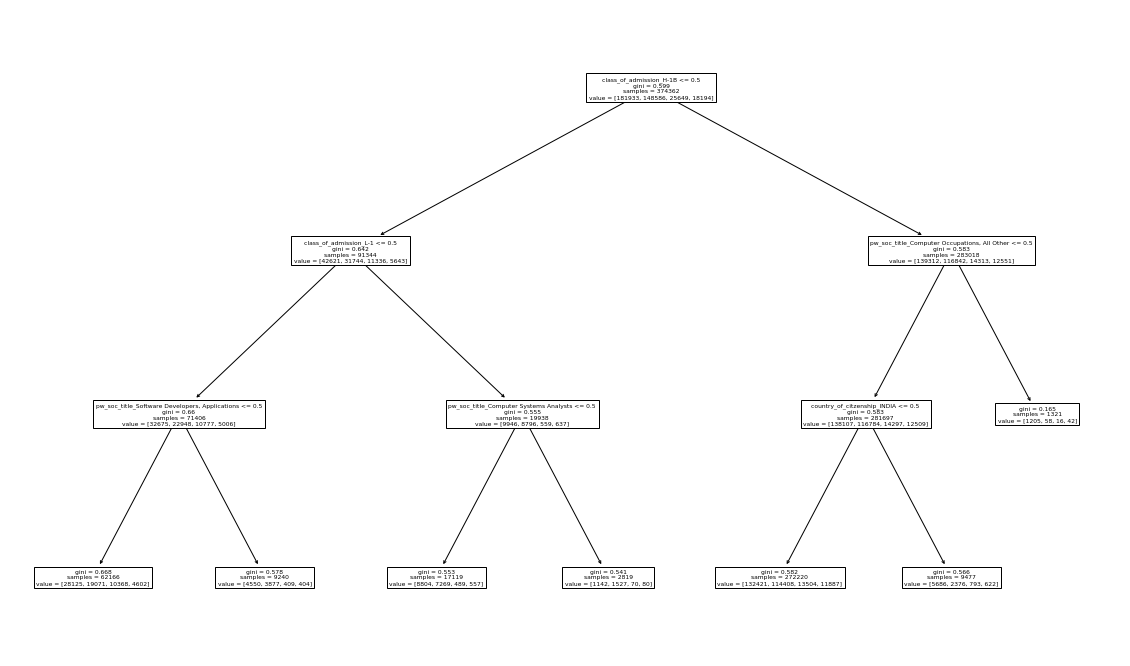

In [15]:
plt.figure(figsize = (20,12))
tree.plot_tree(clf1,feature_names = X1.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


###  Regarding the largest leaf node, this decision tree asks 3 questions: 1. Is their class of admissions H1B?; 2. Is their Standard Occupational Classification (soc) title Computer Occupation, All Other?; 3. Is their country of citizenship INDIA?
###  According to the decision tree above, the largest leaf node has the sample size of 272220 visa applicants. The largest leaf node means that among 272220 visa applicants who have H1B, don't work as Computer Occupation, All Other, and don't come from India, 132421 applicants got 'Certified', 114408 applicants got 'Denied', 13504 applicants got'Certified-Expired', and 11887 applicants got 'Withdrawn.'


# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
max_depths = [1,2,3,4,5,10,50]
outputs1 = []

X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y, test_size = 0.3)

for md in max_depths:
  clf1 = tree.DecisionTreeClassifier(max_depth = md)
  clf1.fit(X1_train,y1_train)

  oos_accuracy1 =  format(clf1.score(X1_test, y1_test))# CALCULATE Out of sample accuracy
  outputs1.append(oos_accuracy1)

In [18]:
outputs1

['0.48411970545548444',
 '0.48411970545548444',
 '0.485303938241815',
 '0.48636351494537394',
 '0.48736076360754704',
 '0.4883936282933692',
 '0.4901031974285231']

###  # According to the outputs, the best max_depth for out-of-sample accuracy is 50, which has the highest accuracy of 0.4904593576650135
